c:\Users\punna\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - accuracy: 0.9171 - loss: 0.1725 - val_accuracy: 0.9986 - val_loss: 0.0139
Epoch 2/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - accuracy: 0.9989 - loss: 0.0072 - val_accuracy: 0.9987 - val_loss: 0.0105
Epoch 3/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.9991 - loss: 0.0059 - val_accuracy: 0.9991 - val_loss: 0.0068
Epoch 4/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.9992 - loss: 0.0045 - val_accuracy: 0.9993 - val_loss: 0.0046
Epoch 5/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - accuracy: 0.9991 - loss: 0.0045 - val_accuracy: 0.9994 - val_loss: 0.0042
Epoch 6/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - accuracy: 0.9992 - loss: 0.0044 - val_accuracy: 0.9994 - val_loss: 0.0036
Epoch 7/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 0.9993 - loss: 0.0036 - val_accuracy: 0.9994 - val_loss: 0.0038
Epoch 8/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 0.9992 - loss: 0.0039 -

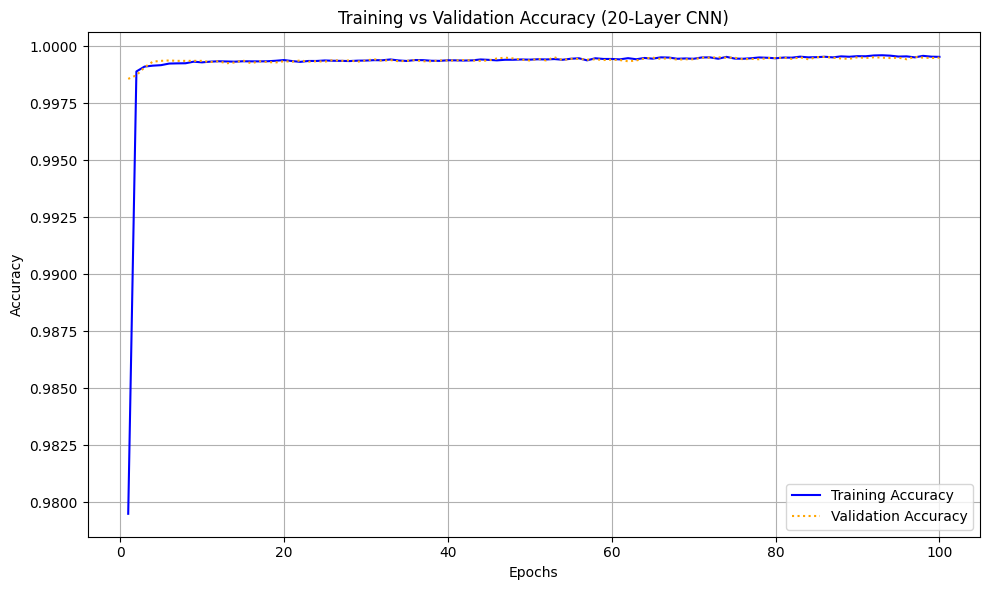

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization, ReLU

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Separate features and target
X = data.drop(['Class'], axis=1)
y = data['Class']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape input for Conv1D: (samples, timesteps, features)
X_scaled = np.expand_dims(X_scaled, axis=2)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the 20-layer CNN model
model = Sequential([
    Conv1D(32, kernel_size=2, input_shape=(X_train.shape[1], 1)),
    ReLU(),
    BatchNormalization(),
    Dropout(0.2),
    Conv1D(64, kernel_size=2),
    ReLU(),
    BatchNormalization(),
    Dropout(0.5),
    Conv1D(64, kernel_size=2),
    ReLU(),
    BatchNormalization(),
    Dropout(0.5),
    Conv1D(64, kernel_size=2),
    ReLU(),
    BatchNormalization(),
    Dropout(0.25),
    Flatten(),
    Dense(100),
    ReLU(),
    Dropout(0.5),
    Dense(50),
    ReLU(),
    Dense(25),
    ReLU(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=2048, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
auc = roc_auc_score(y_test, y_pred_prob)
prc_precision, prc_recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Print Metrics
print("20-Layer Model Metrics:")
print(f"Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Loss: {history.history['val_loss'][-1]:.4f}")
print(f"Confusion Matrix: {cm}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Total Fraudulent Transactions in Test Set: {sum(y_test)}")
import matplotlib.pyplot as plt

# Extract accuracy values
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

# Plot the accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, label='Training Accuracy', linestyle='-', color='blue')      # solid line
plt.plot(epochs, val_acc, label='Validation Accuracy', linestyle=':', color='orange')    # dotted line
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy (20-Layer CNN)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# use the dataset with balancing
# Ourproposed modelhas17layers: a convolutional layer with
# a kernel size of 32
# 2 and a ReLU activation function,
# followed by a batch normalisation layer and a dropout layer
# with a dropout rate of 0.2. Then, we add another convo
# lutional layer with a kernel size of 64
# 2 and a ReLU
# activation function, followed by a batch normalisation layer
# and a dropout layer with a dropout rate of 0.5. Then, we add
# another convolutional layer with a kernel size of 64 2 and a
# ReLUactivation function, followed by a batch normalisation
# layer and a dropout layer with a dropout rate of 0.25.
# Then, we add a attened layer with a kernel size of 64 2
# andaReLUactivationfunction,followedbyadenselayerand
# a dropoutlayerwithadropoutrateof0.5,followedby3dense
# layers. The rst dense layer has aReLUactivationfunctionof
# (100). The second dense layer has a ReLUactivation function
# of (50). The third dense layer has a ReLU activation function of (25). Finally, we add a dense layer for classi cation with a
# sigmoid activation function. After 100 epochs, the accuracy
# is 95.53%.

# Ourproposed modelhas20layers: a convolutional layer with
# a kernel size of 32
# 2 and a ReLU activation function,
# followed by a batch normalisation layer and a dropout layer
# with a dropout rate of 0.2. Then, we add another convo
# lutional layer with a kernel size of 64
# 2 and a ReLU
# activation function, followed by a batch normalisation layer
# and a dropout layer with a dropout rate of 0.5. Then, we add
# another convolutional layer with a kernel size of 64 2 and a
# ReLUactivation function, followed by a batch normalisation
# layer and a dropout layer with a dropout rate of 0.5.
# Then, we add another convolutional layer with a kernel
# size of 64 2andaReLUactivation function, followed by a
# batch normalisation layer and a dropout layer with a dropout
# rate of 0.25. Then, we add a attened layer with a kernel
# size of 64 2 and a ReLU activation function, followed by a dense layer and a dropout layer with a dropout rate of 0.5,
# followed by 3 dense layers. The rst dense layer has a ReLU
# activation function of (100). The second dense layer has a
# ReLU activation function of (50). The third dense layer has
# a ReLU activation function of (25). Finally, we add a dense
# layer for classi cation with a sigmoid activation function. At
# 100 epochs, the accuracy is 94.92%.

# i need training accuracy,validation accuracy and measure the metrics loss, TP,FP,TN,FN,Accuracy,precision,recall,AUC,PRC,total fradulent transactions for both the cnn codes

# the dastaset used is creditcard.csv
#  The imbalanced CCF dataset is transformed into a balanced
#  dataset by removing non fraudulent transactions from the
#  dataset
# i need two seperate codes